<h1>DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

<h1>GRIP @ THE SPARK FOUNDATION

<h1>AUTHOR : KAPIL KISHOR CHANDGADKAR

<h1>Task 2 : Prediction using Unsupervised Machine Learning

From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

Dataset is available at: https://bit.ly/3kXTdox

In [27]:
#Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Loading the dataset
iris=pd.read_csv('iris.csv')
print('Dataset imported successfully')

Dataset imported successfully


In [29]:
#See the first 5 records from the dataset
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
#More information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [31]:
#Check the null values from the columns of the dataset
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<h1>There is no null values

In [32]:
#Describe the all columns from the dataset
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [33]:
iris = iris.drop(columns=['Id','Species'],axis=1)

<h>Column 'ID' have unique entries and column 'Species' have label data those are not useful so we dropped them

<h1>Using Hierarchical Clustering

In [35]:
# Standardized data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std_iris=scaler.fit_transform(iris) #In array form
std_iris=pd.DataFrame(std_iris, columns=iris.columns) #Make data frame
std_iris.tail() #Show last 5 records

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956
149,0.068662,-0.124958,0.762759,0.790591


<h1>Create Dendrogram

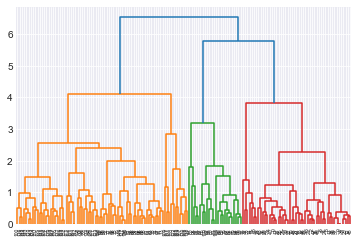

In [36]:
#We can visualize subjective cluster
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(std_iris,method='complete'))
plt.style.use('seaborn-darkgrid')
plt.show()

<h>From above figure we conclude that there are 3 clusters but we will verify from K-Means Clustering

<h1>Using K-Means Clustering

<h>First we have to find optimal number of clusters(value of K)using Elbow Method

In [37]:
from sklearn.cluster import KMeans
WCSS = [] # within cluster sum of square
for i in range(1,10):
    Kmean = KMeans(n_clusters=i, init='k-means++', max_iter=30,n_init=10,random_state=0)
    Kmean.fit(std_iris)
    WCSS.append(Kmean.inertia_)
#WCSS

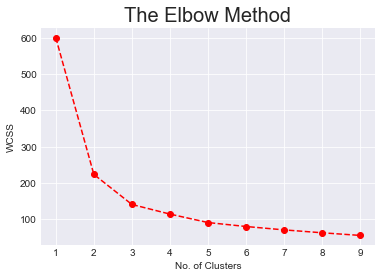

In [38]:
plt.plot(range(1,10),WCSS,'go--',color='red')
plt.title('The Elbow Method', size=20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

<h>We clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

In [43]:
#Build cluster algorithm
kmean = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
clusters = kmean.fit_predict(std_iris)
print('training successfilly')

training successfilly


In [44]:
#Add new column(label)
std_iris['Clusters']=kmean.labels_
std_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1


In [45]:
#We can check values in each clusters
std_iris['Clusters'].value_counts()

2    53
1    50
0    47
Name: Clusters, dtype: int64

<h1>Build A Two Dimensions Clusters Again

In [47]:
#Get centroids
centroids = kmean.cluster_centers_
cen_x = [i[0] for i in centroids] # find center from x-axis for each clusters(we get 3 values)
cen_y = [i[1] for i in centroids]

In [48]:
#Add to df
std_iris['cen_x'] = std_iris.Clusters.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
std_iris['cen_y'] = std_iris.Clusters.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
#Define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
std_iris['c'] = std_iris.Clusters.map({0:colors[0], 1:colors[1], 2:colors[2]})

In [49]:
std_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters,cen_x,cen_y,c
0,-0.900681,1.032057,-1.341272,-1.312977,1,-1.014579,0.842307,#81DF20
1,-1.143017,-0.124958,-1.341272,-1.312977,1,-1.014579,0.842307,#81DF20
2,-1.385353,0.337848,-1.398138,-1.312977,1,-1.014579,0.842307,#81DF20
3,-1.506521,0.106445,-1.284407,-1.312977,1,-1.014579,0.842307,#81DF20
4,-1.021849,1.263460,-1.341272,-1.312977,1,-1.014579,0.842307,#81DF20


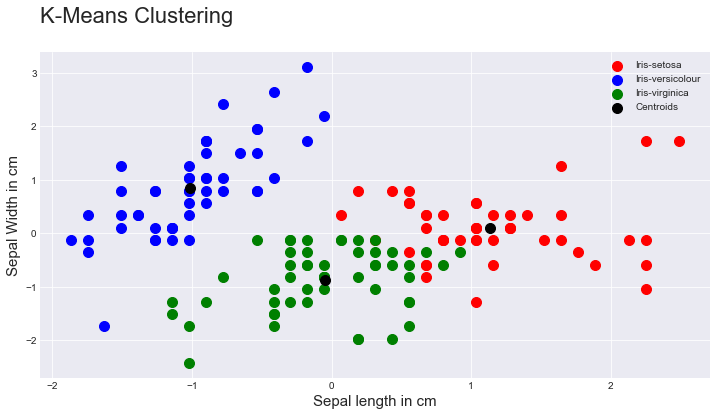

In [50]:
#Visualising the clusters-On the first two columns
plt.figure(figsize=(12,6))
X=std_iris.iloc[:,:4].values
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids') #centroids
plt.title('K-Means Clustering\n', loc='left', fontsize=22)
plt.xlabel('Sepal length in cm',fontsize=15)
plt.ylabel('Sepal Width in cm',fontsize=15)
plt.legend()
plt.show()

<h1>K-Means Clustering with lines from centroids

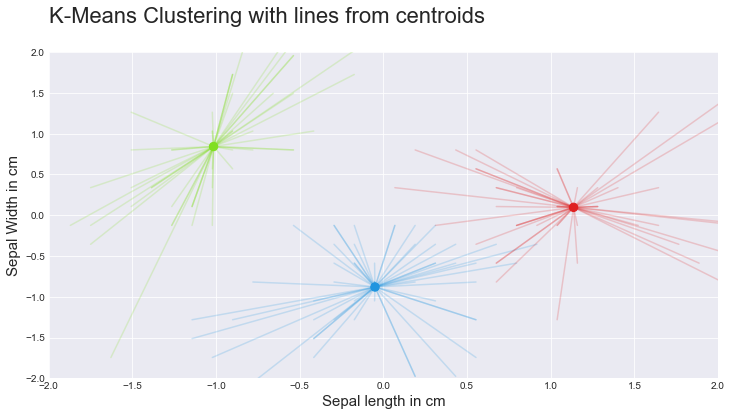

In [51]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(12,6))
#Plot data
plt.scatter(iris.SepalLengthCm, iris.SepalWidthCm, c=std_iris.c, alpha = 0.6, s=10)
#Plot centroids
plt.scatter(cen_x, cen_y, c=colors, s=70)
#Plot lines
for idx, val in std_iris.iterrows():
    x = [val.SepalLengthCm, val.cen_x,]
    y = [val.SepalWidthCm, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('K-Means Clustering with lines from centroids\n', loc='left', fontsize=22)
plt.xlabel('Sepal length in cm',fontsize=15)
plt.ylabel('Sepal Width in cm',fontsize=15)
plt.show()